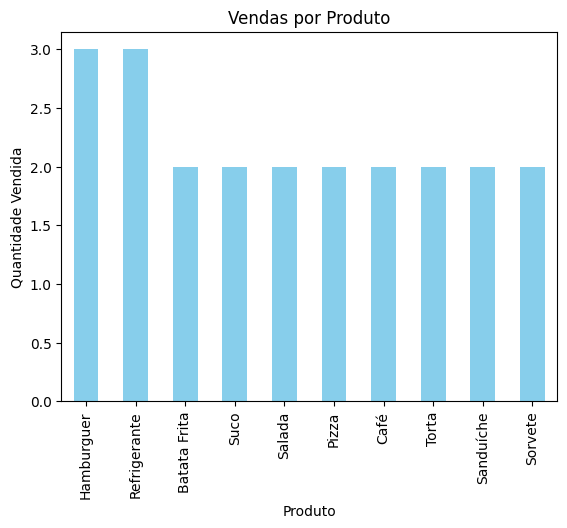

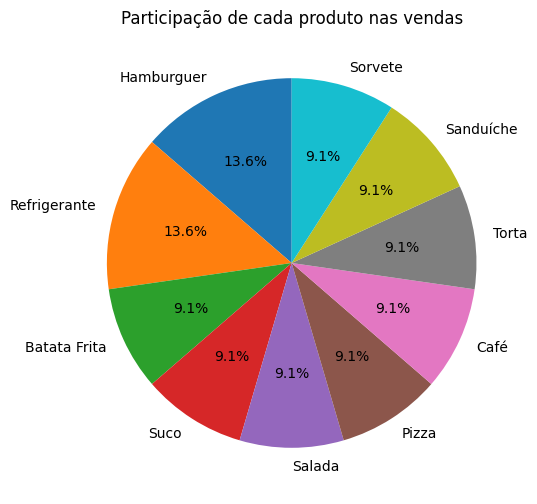

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clientes = pd.read_csv('../dados/clientes.csv')
vendas = pd.read_csv('../dados/vendas.csv')
produtos = pd.read_csv('../dados/produtos.csv')

## 2. Gráfico de vendas por produto

grafico = vendas['produto'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()


vendas['produto'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Participação de cada produto nas vendas')
plt.ylabel('')
plt.show()


## Dica Use `sns.barplot`, `plt.pie`, `plt.bar` para diferentes tipos de visualização.